# Data Analyst with Python Project

# Analyzing Crime in Los Angeles

## <span style="color:red;"> Project Instructions</span>

Explore the `crimes.csv` dataset and use your findings to answer the following questions:

- Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.

- Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`.

- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34`", `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## pandas.read_csv

- dtype : dtype or dict of {Hashabledtype}, optional

Data type(s) to apply to either the whole dataset or individual columns. E.g., `{'a': np.float64, 'b': np.int32, 'c': 'Int64'}` Use `str` or `object` together with suitable `na_values` settings to preserve and not interpret `dtype`. If `converters` are specified, they will be applied INSTEAD of `dtype` conversion.

- parse_dates : bool, list of Hashable, list of lists or dict of {Hashablelist}, default False
The behavior is as follows:

`bool`. If True -> try parsing the index. Note: Automatically set to `True` if `date_format` or `date_parser` arguments have been passed.

`list` of `int` or names. e.g. If `[1, 2, 3]` -> try parsing columns 1, 2, 3 each as a separate date column.

`list` of `list`. e.g. If `[[1, 3]]` -> combine columns 1 and 3 and parse as a single date column. Values are joined with a space before parsing.

`dict`, e.g. `{'foo' : [1, 3]}` -> parse columns 1, 3 as date and call result ‘foo’. Values are joined with a space before parsing.

If a column or index cannot be represented as an array of `datetime`, say because of an unparsable value or a mixture of timezones, the column or index will be returned unaltered as an object data type. For non-standard datetime parsing, use `to_datetime()` after `read_csv()`.

In [299]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv(r"C:\Users\wende\Desktop\DataCamp\Data Analyst with Python\13 Analyzing Crime in Los Angeles\workspace\crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [301]:
# crimes.info()

### Part A

- Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour`.

In [303]:
#TIME OCC

#retrieving the first 2 numbers as hours eg 1110 , 11 as hours
#changing type from object to int
crimes["hour"] = crimes["TIME OCC"].str[:2].astype(int)
crimes["hour"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 185715 entries, 0 to 185714
Series name: hour
Non-Null Count   Dtype
--------------   -----
185715 non-null  int32
dtypes: int32(1)
memory usage: 725.6 KB


In [305]:
##previewing new column

crimes.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16


## seaborn.countplot

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

Note that histplot() function offers similar functionality with additional features (e.g. bar stacking), although its default behavior is somewhat different.

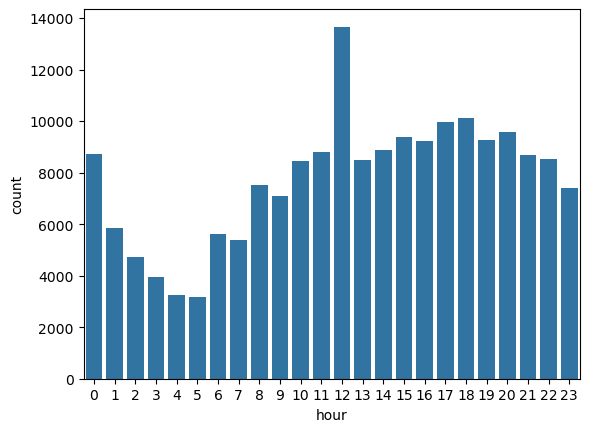

In [308]:
#producing countplot to find largest frequency by hours

sns.countplot(x="hour", data=crimes)
plt.show()

**ANS**

peak_crime_hour = 12

### Part B

Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location`

### .isin()

- Whether each element in the DataFrame is contained in values.

The result will only be true at a location if all the labels match. If values is a Series, that’s the index. If values is a dict, the keys must be the column names, which must match. If values is a DataFrame, then both the index and column labels must match.

In [313]:
night_time = crimes[crimes["hour"].isin([22,23,0,1,2,3])]
night_time.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,hour
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1


##### <span style="color:blue;"> Testing start</span>

**on groupby as_index**

In [316]:
#groupbing by area name with hour
peak_night_location = night_time.groupby("AREA NAME")["hour"].count()
peak_night_location

AREA NAME
77th Street    2558
Central        3312
Devonshire     1348
Foothill       1260
Harbor         1384
Hollenbeck     1315
Hollywood      2699
Mission        1453
N Hollywood    1855
Newton         2142
Northeast      1684
Olympic        2137
Pacific        1916
Rampart        1860
Southeast      2218
Southwest      2347
Topanga        1461
Van Nuys       1629
West LA        1369
West Valley    1520
Wilshire       1716
Name: hour, dtype: int64

In [318]:
#groupbing by area name with hour
peak_night_location = night_time.groupby("AREA NAME",as_index=False)["hour"].count()
peak_night_location

,AREA NAME,hour
0,77th Street,2558
1,Central,3312
2,Devonshire,1348
3,Foothill,1260
4,Harbor,1384
5,Hollenbeck,1315
6,Hollywood,2699
7,Mission,1453
8,N Hollywood,1855
9,Newton,2142


**need to have 2 columns otherwise .sort_values() will trigger error**

##### <span style="color:blue;"> Testing end</span>

In [322]:
#groupby area with hours
#sorting hours in descending

sorted_peak_night_location = night_time.groupby("AREA NAME",as_index=False)["hour"].count().sort_values("hour",ascending=False)
sorted_peak_night_location.head()

,AREA NAME,hour
1,Central,3312
6,Hollywood,2699
0,77th Street,2558
15,Southwest,2347
14,Southeast,2218


##### <span style="color:blue;"> Testing start</span>

##### <span style="color:blue;"> row slicing using  [ ] </span>

In [325]:
sorted_peak_night_location[1:4] #this is similar to range(1,4) #index always start at 0

,AREA NAME,hour
6,Hollywood,2699
0,77th Street,2558
15,Southwest,2347


##### <span style="color:blue;"> slicing using  iloc[ ] </span>

- loc is a technique to select parts of your data based on labels, iloc is position based.

- iloc subset pandas dataframes based on their position or index

In [328]:
#sorted_peak_night_location.iloc[:5] #from start to end
sorted_peak_night_location.iloc[2:6] #from index 2 to 5

,AREA NAME,hour
0,77th Street,2558
15,Southwest,2347
14,Southeast,2218
9,Newton,2142


##### <span style="color:blue;"> Testing end</span>

In [331]:
#slciing the 1st row of df
peak_night_crime_location = sorted_peak_night_location.iloc[0]["AREA NAME"]
print(f"The area with the largest values of night crime is {peak_night_crime_location}")

The area with the largest values of night crime is Central


### Part C

- Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called `victim_ages`, with age group labels `"0-17"`, `"18-25"`, `"26-34`", `"35-44"`, `"45-54"`, `"55-64"`, and `"65+"` as the index and the frequency of crimes as the values.

In [339]:
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf] #np.inf = +ve or -ve infinity
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

#### pandas.cut

- pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

- Bin values into discrete intervals.

- Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

Parameters

x : 
array-like
The input array to be binned. Must be 1-dimensional.

bins  : 
int, sequence of scalars, or IntervalIndex
The criteria to bin by.

int : Defines the number of equal-width bins in the range of x. The range of x is extended by .1% on each side to include the minimum and maximum values of x.

sequence of scalars : Defines the bin edges allowing for non-uniform width. No extension of the range of x is done.

IntervalIndex : Defines the exact bins to be used. Note that IntervalIndex for bins must be non-overlapping.

right  : 
bool, default True
Indicates whether bins includes the rightmost edge or not. If right == True (the default), then the bins [1, 2, 3, 4] indicate (1,2], (2,3], (3,4]. This argument is ignored when bins is an IntervalIndex.

labels  : 
array or False, default None
Specifies the labels for the returned bins. Must be the same length as the resulting bins. If False, returns only integer indicators of the bins. This affects the type of the output container (see below). This argument is ignored when bins is an IntervalIndex. If True, raises an error. When ordered=False, labels must be provided.

retbins  : 
bool, default False
Whether to return the bins or not. Useful when bins is provided as a scalar.

precision  : 
int, default 3
The precision at which to store and display the bins labels.

include_lowest  : 
bool, default False
Whether the first interval should be left-inclusive or not.

duplicates  : 
{default ‘raise’, ‘drop’}, optional
If bin edges are not unique, raise ValueError or drop non-uniques.

ordered  : 
bool, default True
Whether the labels are ordered or not. Applies to returned types Categorical and Series (with Categorical dtype). If True, the resulting categorical will be ordered. If False, the resulting categorical will be unordered (labels must be provided).

In [357]:
#before using pd.cut
crimes["Vict Age"].head()

0    27
1    60
2    28
3    37
4    79
Name: Vict Age, dtype: int64

In [355]:
# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                              bins=age_bins,
                              labels=age_labels)
crimes["Age Bracket"].head()

0    26-34
1    55-64
2    26-34
3    35-44
4      65+
Name: Age Bracket, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65+']

**after using cut, it will store age 27,60,28 into their respective labels**

In [365]:
#Find the category with the largest frequency
victim_ages= crimes["Age Bracket"].value_counts()
victim_ages

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

## <span style="color:red;"> DataCamp solution</span>

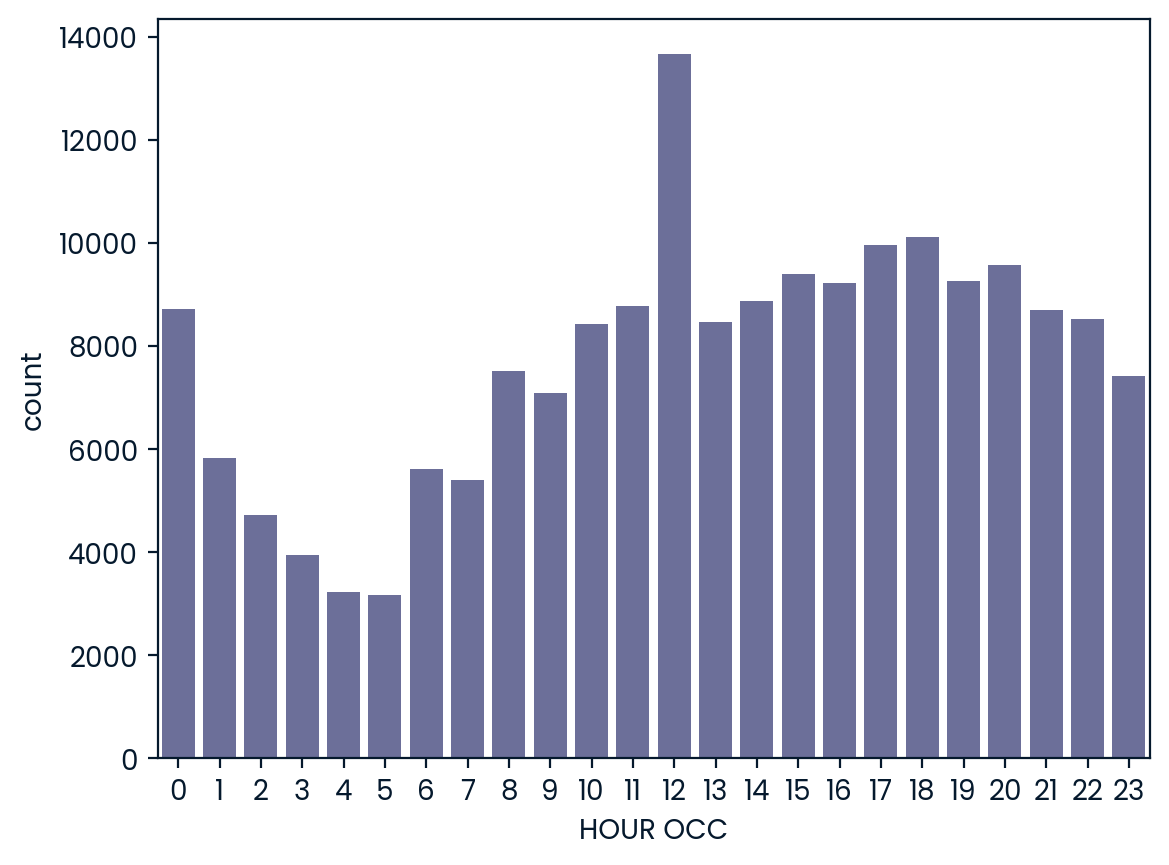

The area with the largest volume of night crime is Central
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64


In [36]:
# Start coding here
# Use as many cells as you need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

#extact the frist 2 digits(hour) from TIME OCC Columns and store as an integer and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
crimes.head()

# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12


## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

#Filtering for night-time hours (0 = midnihght ,3=crimes between 3am and 3.59am)
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")


## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)